In [21]:
import pandas as pd
import numpy as np
import csv
import zipfile

from matplotlib import pyplot as plt
%matplotlib inline

# reading the data from csv file
filepath = "../resources/food.csv.zip"
zf = zipfile.ZipFile(filepath)


In [22]:
food = pd.read_csv(zf.open('food.csv'), parse_dates=True, dtype=object, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8',
                  usecols=["sugars_100g", 
                           "proteins_100g",
                                           "fat_100g",
                                           "salt_100g",
                                           "energy_100g",
                                           "carbohydrates_100g",
                                           "categories_en",
                                          ])



# turn all objects (aside from categories) into floats
food_categories_prediction = food.apply(pd.to_numeric, errors='ignore')

# remove columns with NA values
food_categories_prediction = food_categories_prediction.dropna()

print(food_categories_prediction.shape)
food_categories_prediction.head()

(45124, 7)


,categories_en,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
22,"Desserts,Puddings,Christmas Puddings",1284.0,7.0,54.2,44.0,3.9,0.200000
23,"Desserts,Sugary snacks,Biscuits and cakes,Cake...",1284.0,7.0,54.2,44.0,3.9,0.199898
25,"Beverages,Carbonated drinks,Sodas,Colas,Sugare...",177.0,0.0,10.4,10.4,0.0,0.025400
31,"Plant-based foods and beverages,Plant-based fo...",144.0,0.9,2.9,2.5,3.6,0.000000
34,"Beverages,Plant-based beverages,Carbonated dri...",177.0,0.0,10.4,10.4,0.0,0.100000


In [30]:
food_categories_prediction_copy = food_categories_prediction
#food_categories_prediction_copy = food_categories_prediction_copy.drop(food_categories_prediction_copy[food_categories_prediction_copy['categories_en'].str.contains("beverages") == True].index)
#food_categories_prediction_copy = food_categories_prediction_copy.drop(food_categories_prediction_copy[food_categories_prediction_copy['proteins_100g'] <20].index)
print(food_categories_prediction_copy.shape)
#food_categories_prediction_copy.head()

(45124, 7)


In [31]:
print ("The count of rows with missing data: \n", food_categories_prediction_copy.isnull().sum())


The count of rows with missing data: 
 categories_en         0
energy_100g           0
fat_100g              0
carbohydrates_100g    0
sugars_100g           0
proteins_100g         0
salt_100g             0
dtype: int64


In [32]:
food_categories_prediction_copy.loc[food_categories_prediction_copy['categories_en'].str.contains("Plant-based foods") == True, 'categories_en'] = 1.0
food_categories_prediction_copy.loc[food_categories_prediction_copy['categories_en'].str.contains("Plant-based foods") == False, 'categories_en'] = 0.0
food_categories_prediction_copy
# turn all objects (aside from categories) into floats
food_categories_prediction_copy = food_categories_prediction_copy.apply(pd.to_numeric, errors='ignore')
food_categories_prediction_copy

,categories_en,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
22,0.0,1284.0,7.00,54.20,44.00,3.90,0.200000
23,0.0,1284.0,7.00,54.20,44.00,3.90,0.199898
25,0.0,177.0,0.00,10.40,10.40,0.00,0.025400
31,1.0,144.0,0.90,2.90,2.50,3.60,0.000000
34,0.0,177.0,0.00,10.40,10.40,0.00,0.100000
35,0.0,1900.0,23.00,55.00,26.00,6.00,0.660000
41,0.0,1670.0,15.00,60.00,34.00,4.90,0.600000
46,0.0,1360.0,0.00,75.00,57.50,5.00,0.127000
47,0.0,586.0,0.00,34.00,24.00,0.00,0.076200
54,0.0,1724.0,18.00,57.00,31.00,5.00,0.630000


In [33]:
# Import the kmeans clustering model.
from sklearn.cluster import KMeans

# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=5, random_state=1)
# Get only the numeric columns.
good_columns = food_categories_prediction_copy._get_numeric_data()
# Fit the model using the good columns.
kmeans_model.fit(good_columns.values)
# Get the cluster assignments.
labels = kmeans_model.labels_

In [34]:
print(good_columns)
print(labels)

        categories_en  energy_100g  fat_100g  carbohydrates_100g  sugars_100g  \
22                0.0       1284.0      7.00               54.20        44.00   
23                0.0       1284.0      7.00               54.20        44.00   
25                0.0        177.0      0.00               10.40        10.40   
31                1.0        144.0      0.90                2.90         2.50   
34                0.0        177.0      0.00               10.40        10.40   
35                0.0       1900.0     23.00               55.00        26.00   
41                0.0       1670.0     15.00               60.00        34.00   
46                0.0       1360.0      0.00               75.00        57.50   
47                0.0        586.0      0.00               34.00        24.00   
54                0.0       1724.0     18.00               57.00        31.00   
71                1.0       1665.0      0.50               96.00        96.00   
73                0.0       

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[  189.63707172    35.93793834]
 [  189.63707173    35.93793961]
 [ -918.18550383     1.75595516]
 ..., 
 [ -434.95094546     6.41801731]
 [  548.49676331    29.97319382]
 [-1074.39036064    -8.95382048]]


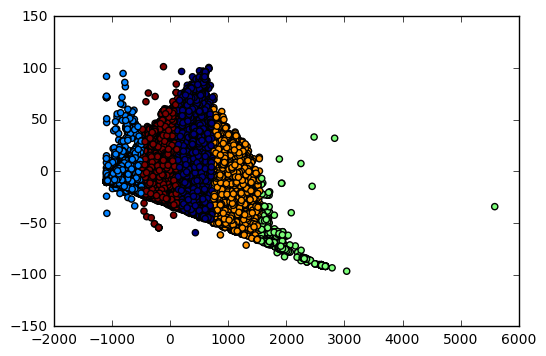

In [35]:
# Import the PCA model.
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
print(pca_2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(good_columns)
print(plot_columns)
# Make a scatter plot of each plant food, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

In [36]:
food_categories_prediction_copy.corr()


,categories_en,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
categories_en,1.000000,-0.015604,-0.113824,0.138874,-0.115858,-0.090415,-0.032603
energy_100g,-0.015604,1.000000,0.788176,0.526834,0.351562,0.216184,-0.021028
fat_100g,-0.113824,0.788176,1.000000,-0.059029,0.016768,0.147041,0.007899
carbohydrates_100g,0.138874,0.526834,-0.059029,1.000000,0.628053,-0.111691,-0.069894
sugars_100g,-0.115858,0.351562,0.016768,0.628053,1.000000,-0.248753,-0.093190
proteins_100g,-0.090415,0.216184,0.147041,-0.111691,-0.248753,1.000000,0.085154
salt_100g,-0.032603,-0.021028,0.007899,-0.069894,-0.093190,0.085154,1.000000


In [37]:
# Import a convenience function to split the sets.
from sklearn.cross_validation import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = food_categories_prediction_copy.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = food_categories_prediction_copy.loc[~food_categories_prediction_copy.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(36099, 7)
(9025, 7)


In [38]:
# Import the linearregression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()

columns = ["sugars_100g", 
                                           "fat_100g",
                                           "carbohydrates_100g",
                                           "proteins_100g",
                                           "salt_100g",
                                           "energy_100g"]
target = ['categories_en']
# Fit the model to the training data.
model.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

0.17211279752920663

In [41]:
print(predictions)
print(test[target])

[[ 0.28519717]
 [ 0.33017142]
 [ 0.10729604]
 ..., 
 [ 0.26996152]
 [ 0.62286679]
 [ 0.30504283]]
        categories_en
54                0.0
98                0.0
99                0.0
122               0.0
143               1.0
162               0.0
208               0.0
210               0.0
211               0.0
224               1.0
226               1.0
237               1.0
238               1.0
278               0.0
283               0.0
289               0.0
295               0.0
324               0.0
370               1.0
408               1.0
421               0.0
426               0.0
429               0.0
430               0.0
450               0.0
460               0.0
462               0.0
463               0.0
464               0.0
467               0.0
...               ...
105864            0.0
105865            0.0
105874            0.0
105926            0.0
105984            0.0
105985            0.0
106053            0.0
106116            0.0
106143            0.0
